# NYPD
This is a demonstration of how to deal with larger datasets.<br>
This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).<br>
<br>
In order to visualize data `matplotlib` is used.

## Import `matplotlib` and `pd.read_csv`

In [53]:
# Needes for inline plots in jupyter notebook
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

In [100]:
#load 311 dataset
df = pd.read_csv("311-service-requests.csv")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. Most frequent complaints
## Getting an overview with `head()`

In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


## Get all columns with `df.columns.tolist()`

In [5]:
colList=df.columns.tolist()
colList

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

## Inspect a combination of columns

In [7]:
df[['Complaint Type', 'Borough']].head()

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN


## Most frequent complaints
Use `.value_counts()` in order to find most frequent complaints.

In [9]:
#Show most common complaint type
df['Complaint Type'].value_counts().head()

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
Name: Complaint Type, dtype: int64

But it gets better! We can plot them!

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


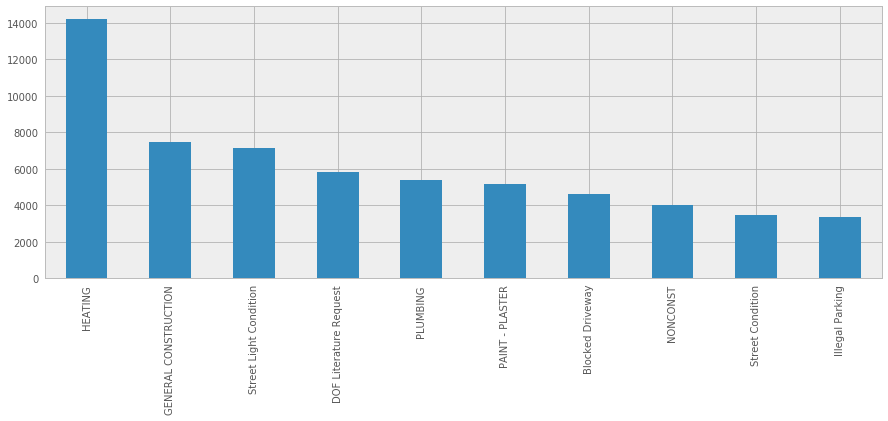

In [12]:
df['Complaint Type'].value_counts()[:10].plot(kind='bar')

# 2. Noise complaints
## Find the correct noise complaint

In [29]:
typeList=[x for x in df['Complaint Type'].unique()]
typeList[5:10]

['Blocked Driveway',
 'Noise - House of Worship',
 'Street Light Condition',
 'Harboring Bees/Wasps',
 'Taxi Complaint']

In [31]:
for item in typeList:
    if 'oise' in item:
        print(item)

Noise - Street/Sidewalk
Noise - Commercial
Noise - Vehicle
Noise - House of Worship
Noise - Park
Noise
Noise - Helicopter
Collection Truck Noise


In [32]:
noise = df[df['Complaint Type'] == "Noise - Street/Sidewalk"]
noise.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013.0,171076.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577.0,140964.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


## Filter for relevant noise complaints in Brooklyn
Create a True/False `pandas.core.series.Series`

In [47]:
isNoise = df["Complaint Type"] == "Noise - Street/Sidewalk"

inBrooklyn = df["Borough"] == "BROOKLYN"

isNoise.head()
#type(isNoise)

0     True
1    False
2    False
3    False
4    False
Name: Complaint Type, dtype: bool

In [48]:
# Dsiplay the AND filter created above
df[
    (df["Complaint Type"] == "Noise - Street/Sidewalk") & 
    (df["Borough"] == "BROOKLYN")
].head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937.0,170310.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,WASHINGTON AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:05:10 AM,10/31/2013 01:29:29 AM,09 BROOKLYN,BROOKLYN,995366.0,180388.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,DOBBIN STREET,NORMAN STREET,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,10/31/2013 07:26:32 AM,10/31/2013 12:18:54 AM,01 BROOKLYN,BROOKLYN,996925.0,203271.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"


## Select relevant columns

In [41]:
df.columns.tolist()

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Action Updated Date',
 'Community Board',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Park Facility Name',
 'Park Borough',
 'School Name',
 'School Number',
 'School Region',
 'School Code',
 'School Phone Number',
 'School Address',
 'School City',
 'School State',
 'School Zip',
 'School Not Found',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

## Use the created AND filter (or True/False series)

In [49]:
df[isNoise & inBrooklyn][
    ['Complaint Type', 'Borough', 'Created Date', 'Descriptor']
].head()

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party


# Fun facts about numpy arrays

On the inside, the type of a column is `pd.Series`.<br>
Pandas series are internally numpy arrays.<br>
If you add `.values` to the end of any `Series`, you'll get its internal numpy array.

In [27]:
np.array([1,2,3])

array([1, 2, 3])

In [28]:
pd.Series([1,2,3]).values

array([1, 2, 3])

## True/False logic in series and arrays

In [29]:
arr = np.array([1,2,3])

In [30]:
arr != 2

array([ True, False,  True], dtype=bool)

In [31]:
arr[arr != 2]

array([1, 3])

# Back to noise complaints
## Combinations of True/False series
### Which borough has the most noise complaints?
Use `value_counts()` to get frequencies?

In [50]:
isNoise = df['Complaint Type'] == "Noise - Street/Sidewalk"

noiseDF = df[isNoise]

noiseDF['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

## Get totals to calculate percentages for *proportions*

In [51]:
noiseFreq = noiseDF["Borough"].value_counts()

totalFreq = df["Borough"].value_counts()

result = noiseFreq / totalFreq

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


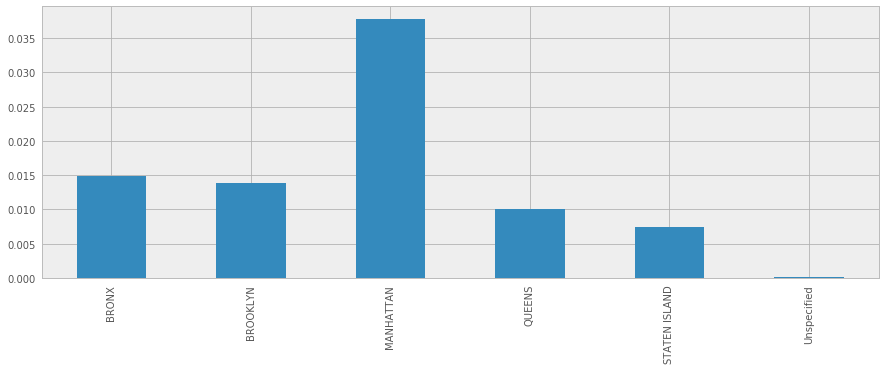

In [52]:
(result).plot(kind='bar')

So Manhattan really does complain more about noise than the other boroughs! Neat.

# 3. Cleansing messy data
## Probing for the order of magnitude of messiness

To get a sense for whether a column has problems, I usually use `.unique()` to look at all its values. If it's a numeric column, I'll instead plot a histogram to get a sense of the distribution.

When we look at the unique values in "Incident Zip", it quickly becomes clear that this is a mess.

Some of the problems:

* Some have been parsed as strings, and some as floats
* There are `nan`s 
* Some of the zip codes are `29616-0759` or `83`
* There are some N/A values that pandas didn't recognize, like 'N/A' and 'NO CLUE'

What we can do:

* Normalize 'N/A' and 'NO CLUE' into regular nan values
* Look at what's up with the 83, and decide what to do
* Make everything strings

In [54]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


## Different types of `NaN`

In [55]:
np.nan==np.isnan

False

## Finding wrong entries with `try: except:`

In [4]:
zipList = df['Incident Zip'].unique().tolist()

def getBreak(inList):
    breakList=[]
    for item in inList:
        try:
            if int(item) <= 0:
                breakList.append(item)
        except:
            breakList.append(item)
    return breakList

getBreak(zipList)
# df.applymap(np.isreal)

[nan,
 '77092-2016',
 '55164-0737',
 '000000',
 '00000',
 '11549-3650',
 '29616-0759',
 '35209-3114']

# Fixing the nan values and string/float confusion

We can pass a `na_values` option to `pd.read_csv` to clean this up a little bit.<br>
We can also specify that the type of `Incident Zip` is a string, not a float.

In [5]:
# Specifiy how to handle na_values 
# and how to handle 'Incidient Zip' (In this case as a string)

naList = ["NO CLUE", "N/A", "0"]

df = pd.read_csv(
    '311-service-requests.csv', 
    na_values=naList, 
    dtype={'Incident Zip': str}
)

getBreak(df['Incident Zip'].unique().tolist())

[nan,
 '77092-2016',
 '55164-0737',
 '000000',
 '00000',
 '11549-3650',
 '29616-0759',
 '35209-3114']

## What's up with the dashes?
How many dash entries are there?

In [112]:
dashSer=df['Incident Zip'].str.contains('-').fillna(False)

len(df[dashSer])

5

In [113]:
df[dashSer]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
29136,26550551,10/24/2013 06:16:34 PM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,False Advertising,NaN,77092-2016,2700 EAST SELTICE WAY,EAST SELTICE WAY,NaN,NaN,NaN,NaN,NaN,HOUSTON,NaN,NaN,Assigned,11/13/2013 11:15:20 AM,10/29/2013 11:16:16 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30939,26548831,10/24/2013 09:35:10 AM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,NaN,55164-0737,P.O. BOX 64437,64437,NaN,NaN,NaN,NaN,NaN,ST. PAUL,NaN,NaN,Assigned,11/13/2013 02:30:21 PM,10/29/2013 02:31:06 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70539,26488417,10/15/2013 03:40:33 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,11549-3650,365 HOFSTRA UNIVERSITY,HOFSTRA UNIVERSITY,NaN,NaN,NaN,NaN,NaN,HEMSTEAD,NaN,NaN,Assigned,11/30/2013 01:20:33 PM,10/16/2013 01:21:39 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,La Guardia Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85821,26468296,10/10/2013 12:36:43 PM,10/26/2013 01:07:07 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Debt Not Owed,NaN,29616-0759,PO BOX 25759,BOX 25759,NaN,NaN,NaN,NaN,NaN,GREENVILLE,NaN,NaN,Closed,10/26/2013 09:20:28 AM,10/26/2013 01:07:07 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89304,26461137,10/09/2013 05:23:46 PM,10/25/2013 01:06:41 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,NaN,35209-3114,600 BEACON PKWY,BEACON PKWY,NaN,NaN,NaN,NaN,NaN,BIRMINGHAM,NaN,NaN,Closed,10/25/2013 02:43:42 PM,10/25/2013 01:06:41 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Delete erroneous entries
I thought these were missing data and originally deleted them like this:

`df['Incident Zip'][dashSer] = np.nan`

But then my friend Google pointed out that 9-digit zip codes are normal. 

Let's look at all the zip codes with more than 5 digits, make sure they're okay, and then truncate them.

In [116]:
#show all zip codes greater than 5 / group them

greaterSer =df['Incident Zip'].str.len() > 5

df['Incident Zip'][greaterSer].unique().tolist()

['77092-2016',
 '55164-0737',
 '000000',
 '11549-3650',
 '29616-0759',
 '35209-3114']

Those all look okay to truncate to me.

In [118]:
# truncate those zips, 
# slice the first part (zero to five)
# and write it to the incident zip column

df['Incident Zip'] = df['Incident Zip'].str.slice(0,5)

## Exotic entries
Earlier I thought `00083` was a broken zip code, but turns out **Central Park's** zip code `00083`!<br>
I'm still concerned about the `00000` zip codes, though: let's look at that. 

In [119]:
df[df["Incident Zip"] == "00000"]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
42600,26529313,10/22/2013 02:51:06 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,00000,EWR EWR,EWR,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/07/2013 09:53:51 AM,10/23/2013 09:54:43 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,26507389,10/17/2013 05:48:44 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,00000,1 NEWARK AIRPORT,NEWARK AIRPORT,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/02/2013 11:59:46 AM,10/18/2013 12:01:08 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#set all zips with 00000 to nan
zeroSer = df['Incident Zip'] == '00000'
df.loc[zeroSer, 'Incident Zip'] = np.nan

In [122]:
getBreak(df['Incident Zip'].unique().tolist())

[nan]

## Amazing!
This is much cleaner.<br>
There's something a bit weird here, though.<br>
Please look up `77056` on Google maps<br>
Let's take a closer look:<br>
## Another True/False series creation
Let's say the zips starting with `'0'` and `'1'` are OK, for now.<br>
This isn't actually true -- `13221` is in Syracuse, and why?<br>
There are a bunch of `NaN`, so we'll say they're `False`.

In [6]:
zipSer = df['Incident Zip']

# closeSer => zips that are close, starting with 0 and 1
closeSer = zipSer.str.startswith('0') | zipSer.str.startswith('1')

# farSer => not is close AND zips that are not null
farSer = ~(closeSer) & zipSer.notnull()

In [7]:
zipSer[farSer]

12102         77056
13450         70711
29136    77092-2016
30939    55164-0737
44008         90010
47048         23541
57636         92123
71001         92123
71834         23502
80573         61702
85821    29616-0759
89304    35209-3114
94201         41042
Name: Incident Zip, dtype: object

In [8]:
# Show all far requests and their incident zip, descriptor and city. 
# Sort them by 'Incident Zip'
df[farSer][['Incident Zip', 'Descriptor','City']]

,Incident Zip,Descriptor,City
12102,77056,Debt Not Owed,HOUSTON
13450,70711,Contract Dispute,CLIFTON
29136,77092-2016,False Advertising,HOUSTON
30939,55164-0737,Harassment,ST. PAUL
44008,90010,Billing Dispute,LOS ANGELES
47048,23541,Harassment,NORFOLK
57636,92123,Harassment,SAN DIEGO
71001,92123,Billing Dispute,SAN DIEGO
71834,23502,Harassment,NORFOLK
80573,61702,Billing Dispute,BLOOMIGTON


Okay, there really are requests coming from LA and Houston!<br>
Good to know. Filtering by `Incident Zip` is probably a **bad** way to handle this.<br>
We should really be looking at the `City` instead.

In [135]:
# Filter all requesty by the city they're coming from
df['City'].str.upper().value_counts().head(8)

BROOKLYN         31662
NEW YORK         22664
BRONX            18438
STATEN ISLAND     4766
JAMAICA           2246
FLUSHING          1803
ASTORIA           1568
RIDGEWOOD         1073
Name: City, dtype: int64

# Finally
Here's what we ended up doing to clean up our zip codes, all together.

In [9]:
# Handle 'Incidient Zip' (In this case as a string)

naList = ["NO CLUE", "N/A", "0"]

df = pd.read_csv(
    '311-service-requests.csv', 
    na_values=naList, 
    dtype={'Incident Zip': str}
)

getBreak(df['Incident Zip'].unique().tolist())

[nan,
 '77092-2016',
 '55164-0737',
 '000000',
 '00000',
 '11549-3650',
 '29616-0759',
 '35209-3114']

In [63]:
# Write a function to cut away unnecesary zip-parts.

def fix_zip_codes(zips):
    # Truncate everything to length 5 
    zips = zips.str.slice(0, 5)
    
    # Set 00000 zip codes to nan
    zero_zips = zips == '00000'
    zips[zero_zips] = np.nan
    
    return zips

In [19]:
# Write a function to cut away unnecesary zip-parts.

def sliceZip(zipSer):
    zipSer = zipSer.str.slice(0,5)
    zeroSer = zipSer == '00000'
    zipSer[zeroSer] = np.nan
    return zipSer

In [20]:
df['Incident Zip'] = sliceZip(df['Incident Zip'])

# sliceZip(df['Incident Zip']).unique()
df['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',